This script was used to analyse the results from the multiples MPRA simulations when varying the experimental parameters
Pa


In [2]:
%%html
<style>
body {
    font-family: "Optima", cursive, sans-serif;
}
</style>  

In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.gridspec as gsp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import scipy.stats as stats 
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important;}</style>"))  
from scipy.special import gamma, factorial,digamma
import numdifftools as nd
from scipy.optimize import minimize 
import plotly.graph_objects as go
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Estimating the mean $\mu$ 
 $$\mathbb{E}_{data}[\frac{|\hat{\mu}-\mu|}{\mu}] $$ 

## Results of the inference when varying the experimental parameters

[Text(0.5, 87.0000000000001, 'Reads allocated')]

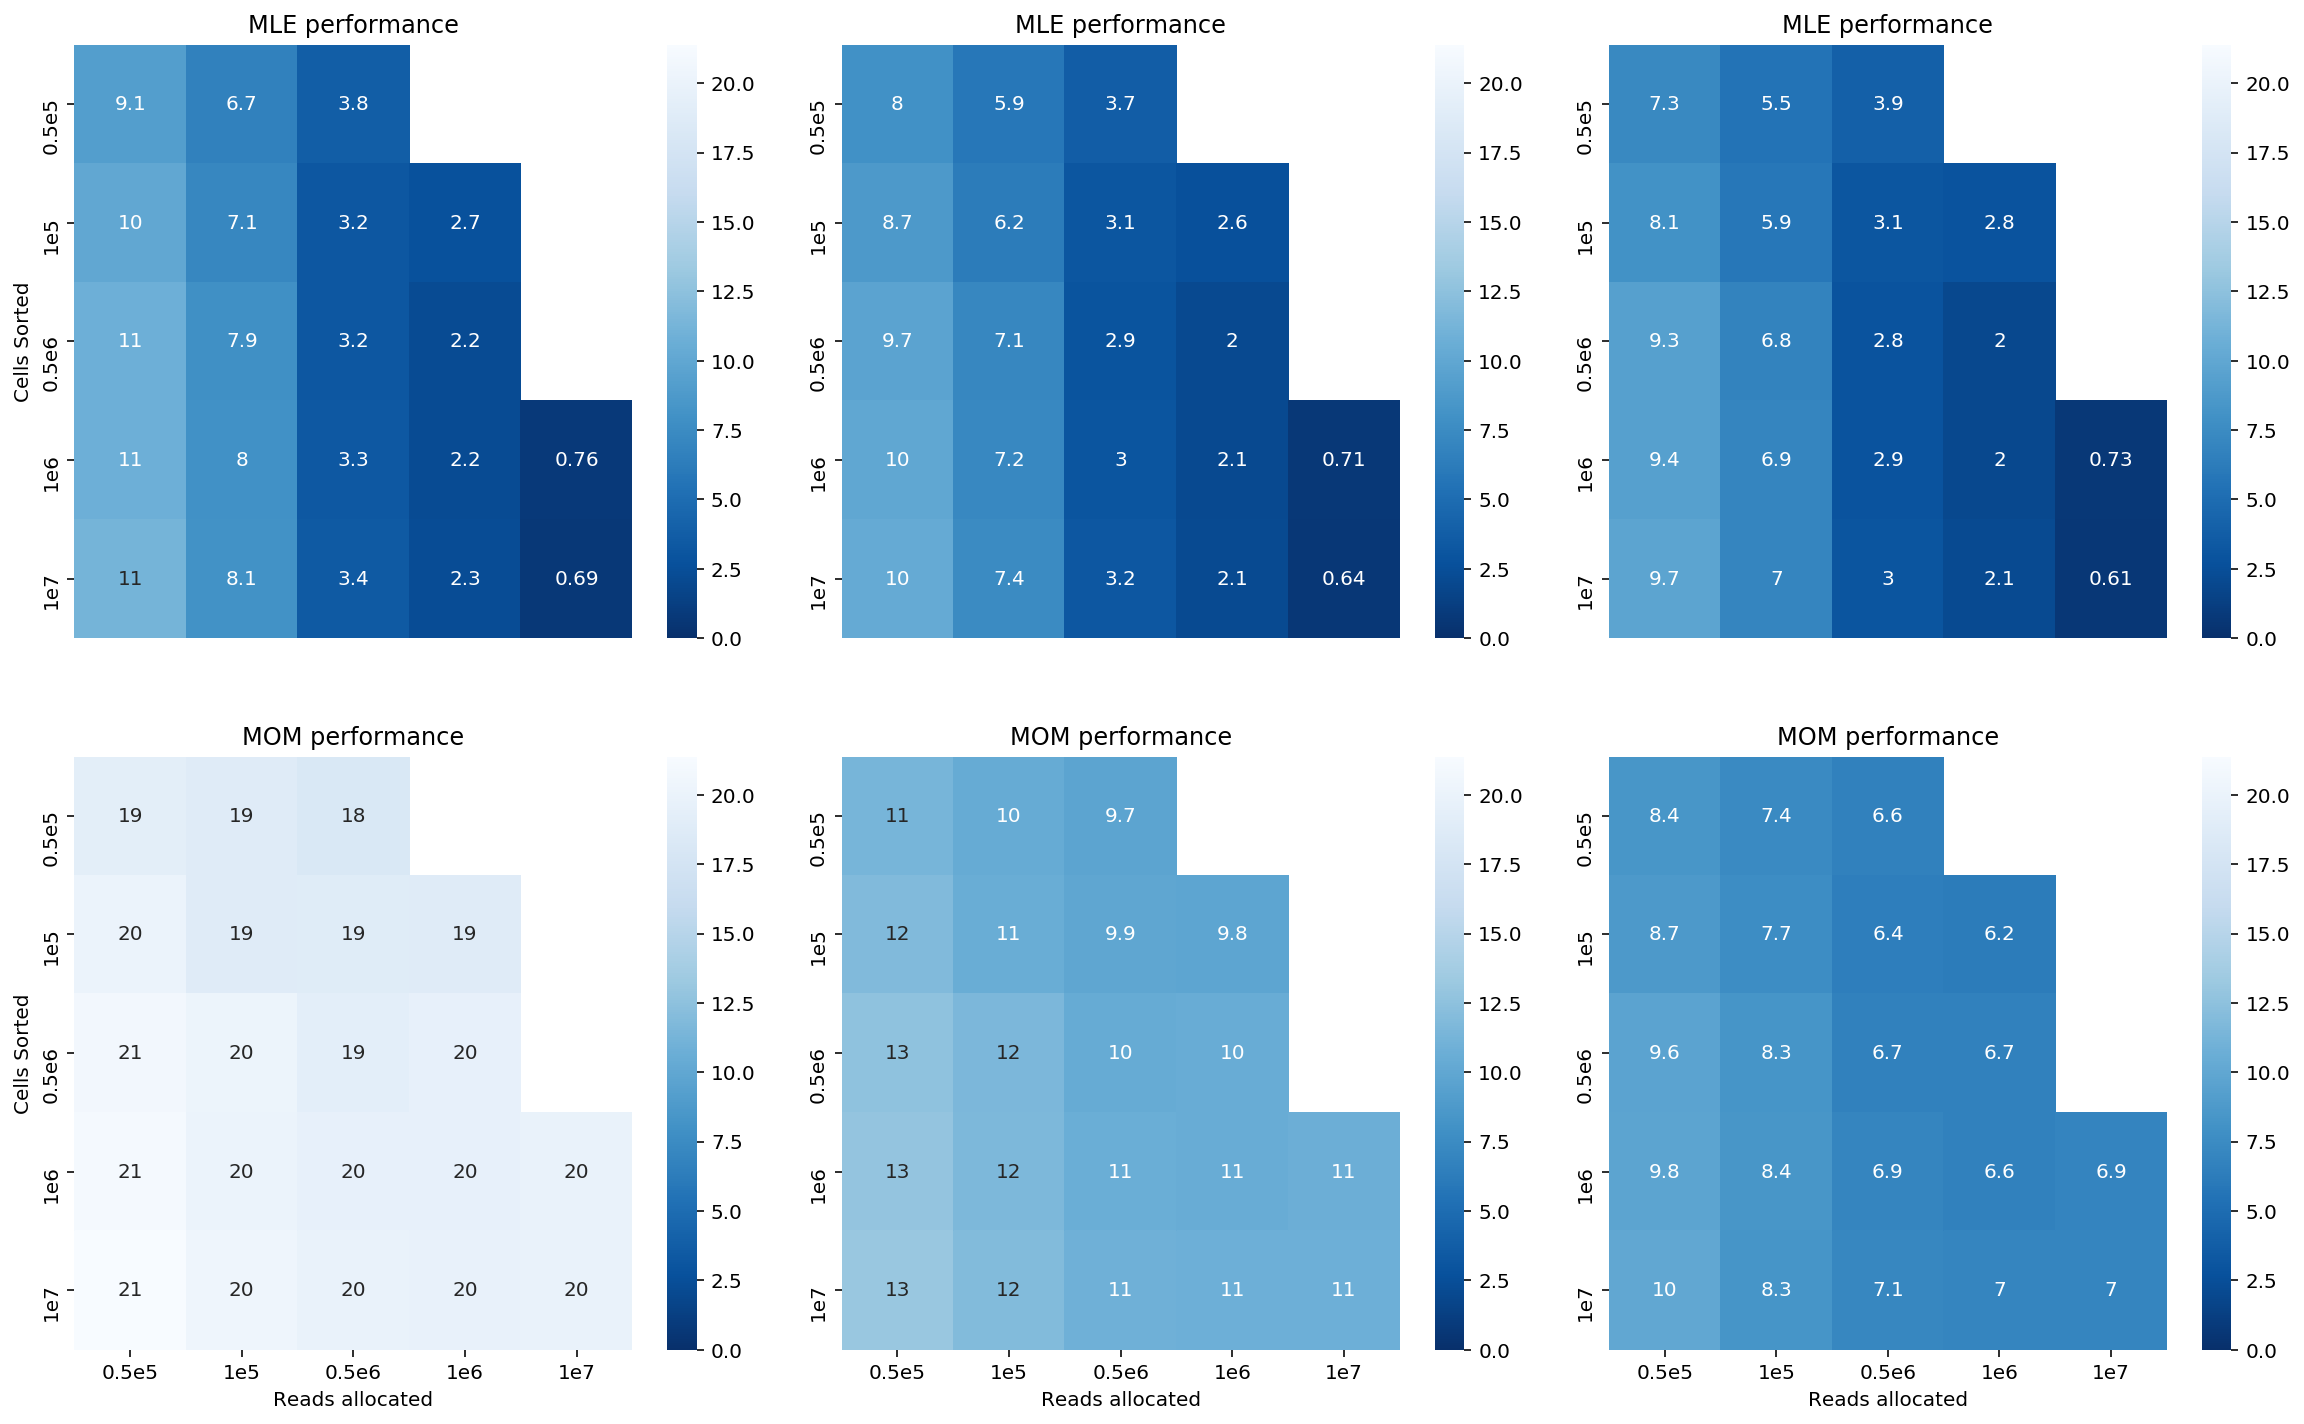

In [5]:
Mean_sur_MLE=np.load('Mean_sur_MLE.npy')
MLE12=100*np.mean(Mean_sur_MLE,axis=0)
Mean_sur_MLE=np.load('Mean_sur_MLE2.npy')
MLE16=100*np.mean(Mean_sur_MLE,axis=0)
Mean_sur_MLE=np.load('Mean_sur_MLE3.npy')
MLE20=100*np.mean(Mean_sur_MLE,axis=0)

Mean_sur_MOM=np.load('Mean_sur_MOM.npy')
MOM12=100*np.mean(Mean_sur_MOM,axis=0)
Mean_sur_MOM=np.load('Mean_sur_MOM2.npy')
MOM16=100*np.mean(Mean_sur_MOM,axis=0)
Mean_sur_MOM=np.load('Mean_sur_MOM3.npy')
MOM20=100*np.mean(Mean_sur_MOM,axis=0)


mask = np.zeros(MLE16.shape, dtype=bool)
mask[0,4]= True
mask[0,3]= True
mask[1,4]= True
mask[2,4]= True

fig = plt.figure(figsize=(20,12))
gs = gsp.GridSpec(nrows=2, ncols=3, figure=fig, width_ratios= [1, 1,1 ],height_ratios=[1, 1 ],wspace=0.1,hspace=0.2)
range_parameters=['0.5e5','1e5','0.5e6','1e6','1e7']
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(MLE12, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=range_parameters, mask = mask,ax=ax1, cmap="Blues_r")
ax1.set_title('MLE performance')
ax1.set(ylabel='Cells Sorted')
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('MLE performance')
sns.heatmap(MLE16, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=range_parameters, mask = mask,ax=ax2, cmap="Blues_r")
ax3 = fig.add_subplot(gs[0, 2])
sns.heatmap(MLE20, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=range_parameters, mask = mask,ax=ax3, cmap="Blues_r")
ax3.set_title('MLE performance')
ax1.set_title('MLE performance')
ax4 = fig.add_subplot(gs[1, 0])
ax4.set_title('MOM performance')
sns.heatmap(MOM12, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=range_parameters, mask = mask,ax=ax4, cmap="Blues_r")
ax4.set(xlabel='Reads allocated',ylabel='Cells Sorted')
ax5 = fig.add_subplot(gs[1, 1])
ax5.set_title('MOM performance')
sns.heatmap(MOM16, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=range_parameters, mask = mask,ax=ax5, cmap="Blues_r")
ax5.set(xlabel='Reads allocated')
ax6 = fig.add_subplot(gs[1, 2])
ax6.set_title('MOM performance')
sns.heatmap(MOM20, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=range_parameters, mask = mask,ax=ax6, cmap="Blues_r")
ax6.set(xlabel='Reads allocated')

- Same graph, but using a dark palette

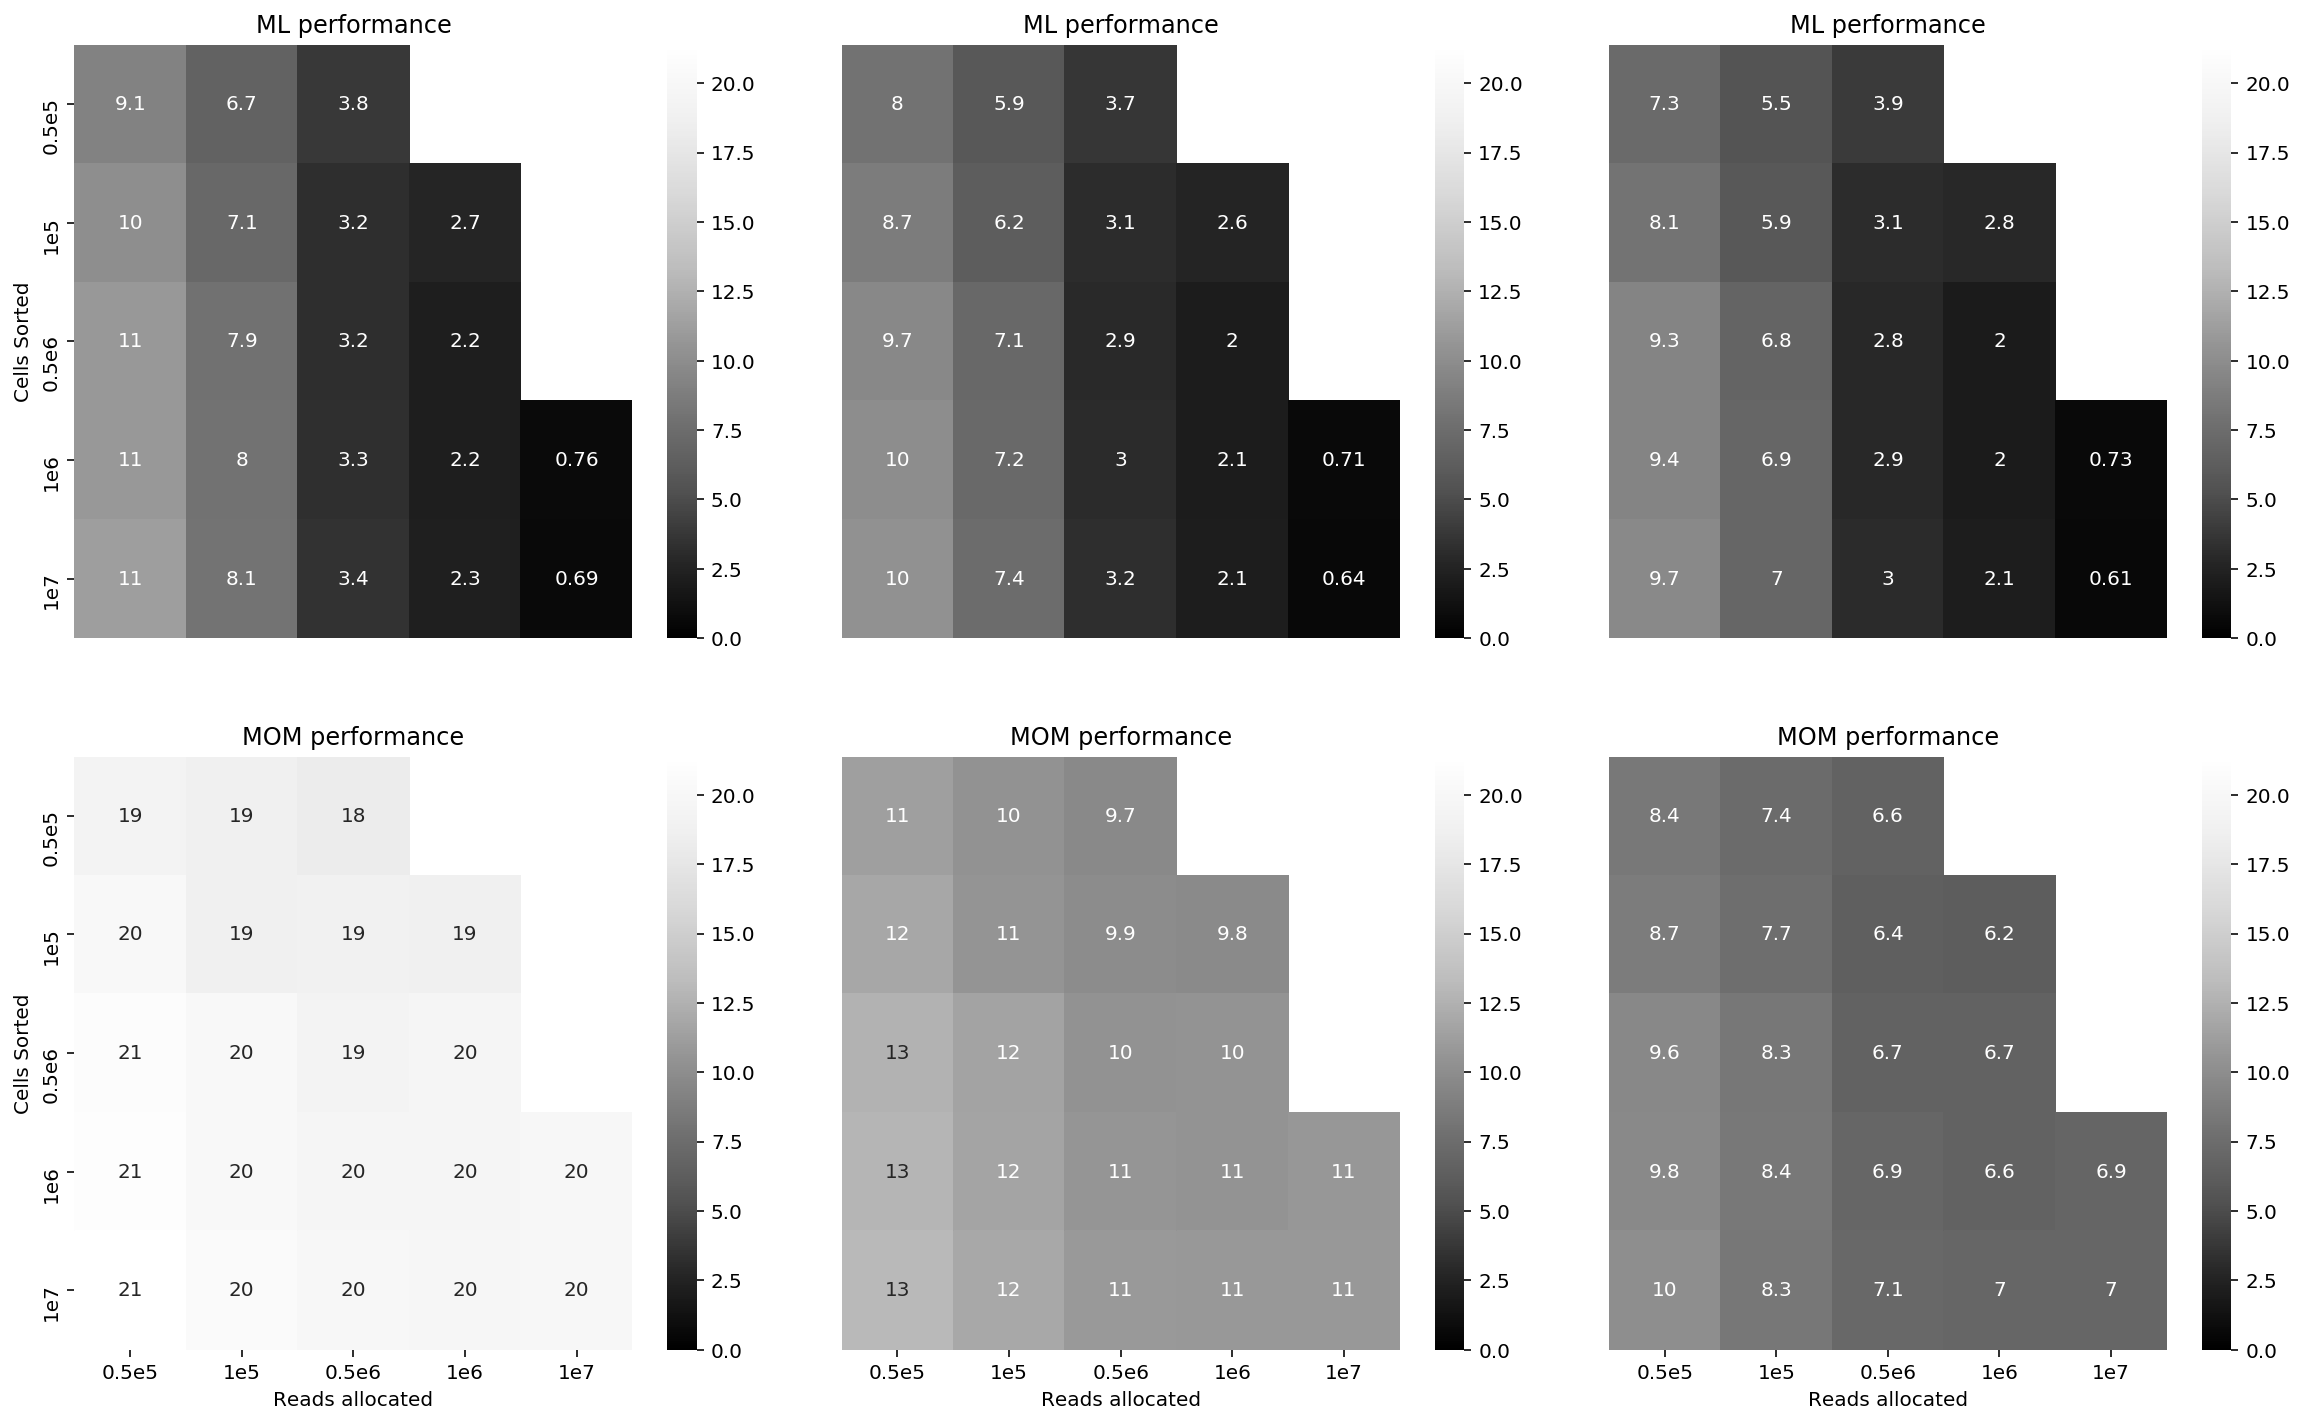

In [6]:
Mean_sur_MLE=np.load('Mean_sur_MLE.npy')
MLE12=100*np.mean(Mean_sur_MLE,axis=0)
Mean_sur_MLE=np.load('Mean_sur_MLE2.npy')
MLE16=100*np.mean(Mean_sur_MLE,axis=0)
Mean_sur_MLE=np.load('Mean_sur_MLE3.npy')
MLE20=100*np.mean(Mean_sur_MLE,axis=0)

Mean_sur_MOM=np.load('Mean_sur_MOM.npy')
MOM12=100*np.mean(Mean_sur_MOM,axis=0)
Mean_sur_MOM=np.load('Mean_sur_MOM2.npy')
MOM16=100*np.mean(Mean_sur_MOM,axis=0)
Mean_sur_MOM=np.load('Mean_sur_MOM3.npy')
MOM20=100*np.mean(Mean_sur_MOM,axis=0)


mask = np.zeros(MLE16.shape, dtype=bool)
mask[0,4]= True
mask[0,3]= True
mask[1,4]= True
mask[2,4]= True

fig = plt.figure(figsize=(20,12))
gs = gsp.GridSpec(nrows=2, ncols=3, figure=fig, width_ratios= [1, 1,1 ],height_ratios=[1, 1 ],wspace=0.1,hspace=0.2)
range_parameters=['0.5e5','1e5','0.5e6','1e6','1e7']
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(MLE12, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=range_parameters, mask = mask,ax=ax1, cmap='Greys_r')
ax1.set_title('ML performance')
ax1.set(ylabel='Cells Sorted')
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('ML performance')
sns.heatmap(MLE16, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=False, mask = mask,ax=ax2, cmap='Greys_r')
ax3 = fig.add_subplot(gs[0, 2])
sns.heatmap(MLE20, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=False, mask = mask,ax=ax3, cmap='Greys_r')
ax3.set_title('ML performance')
ax1.set_title('ML performance')
ax4 = fig.add_subplot(gs[1, 0])
ax4.set_title('MOM performance')
sns.heatmap(MOM12, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=range_parameters, mask = mask,ax=ax4, cmap='Greys_r')
ax4.set(xlabel='Reads allocated',ylabel='Cells Sorted')
ax5 = fig.add_subplot(gs[1, 1])
ax5.set_title('MOM performance')
sns.heatmap(MOM16, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=False, mask = mask,ax=ax5, cmap='Greys_r')
ax5.set(xlabel='Reads allocated')
ax6 = fig.add_subplot(gs[1, 2])
ax6.set_title('MOM performance')
sns.heatmap(MOM20, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=False, mask = mask,ax=ax6, cmap='Greys_r')
ax6.set(xlabel='Reads allocated')
#plt.title('Average performance of the MLE estimator')
plt.savefig('Heatmaps_mu_original_taniguchi.png',transparent=True,bbox_inches='tight',dpi=600)

## Display standard error of the simulations

[Text(943.2499999999999, 0.5, 'Cells Sorted'),
 Text(0.5, 87.0000000000001, 'Reads allocated')]

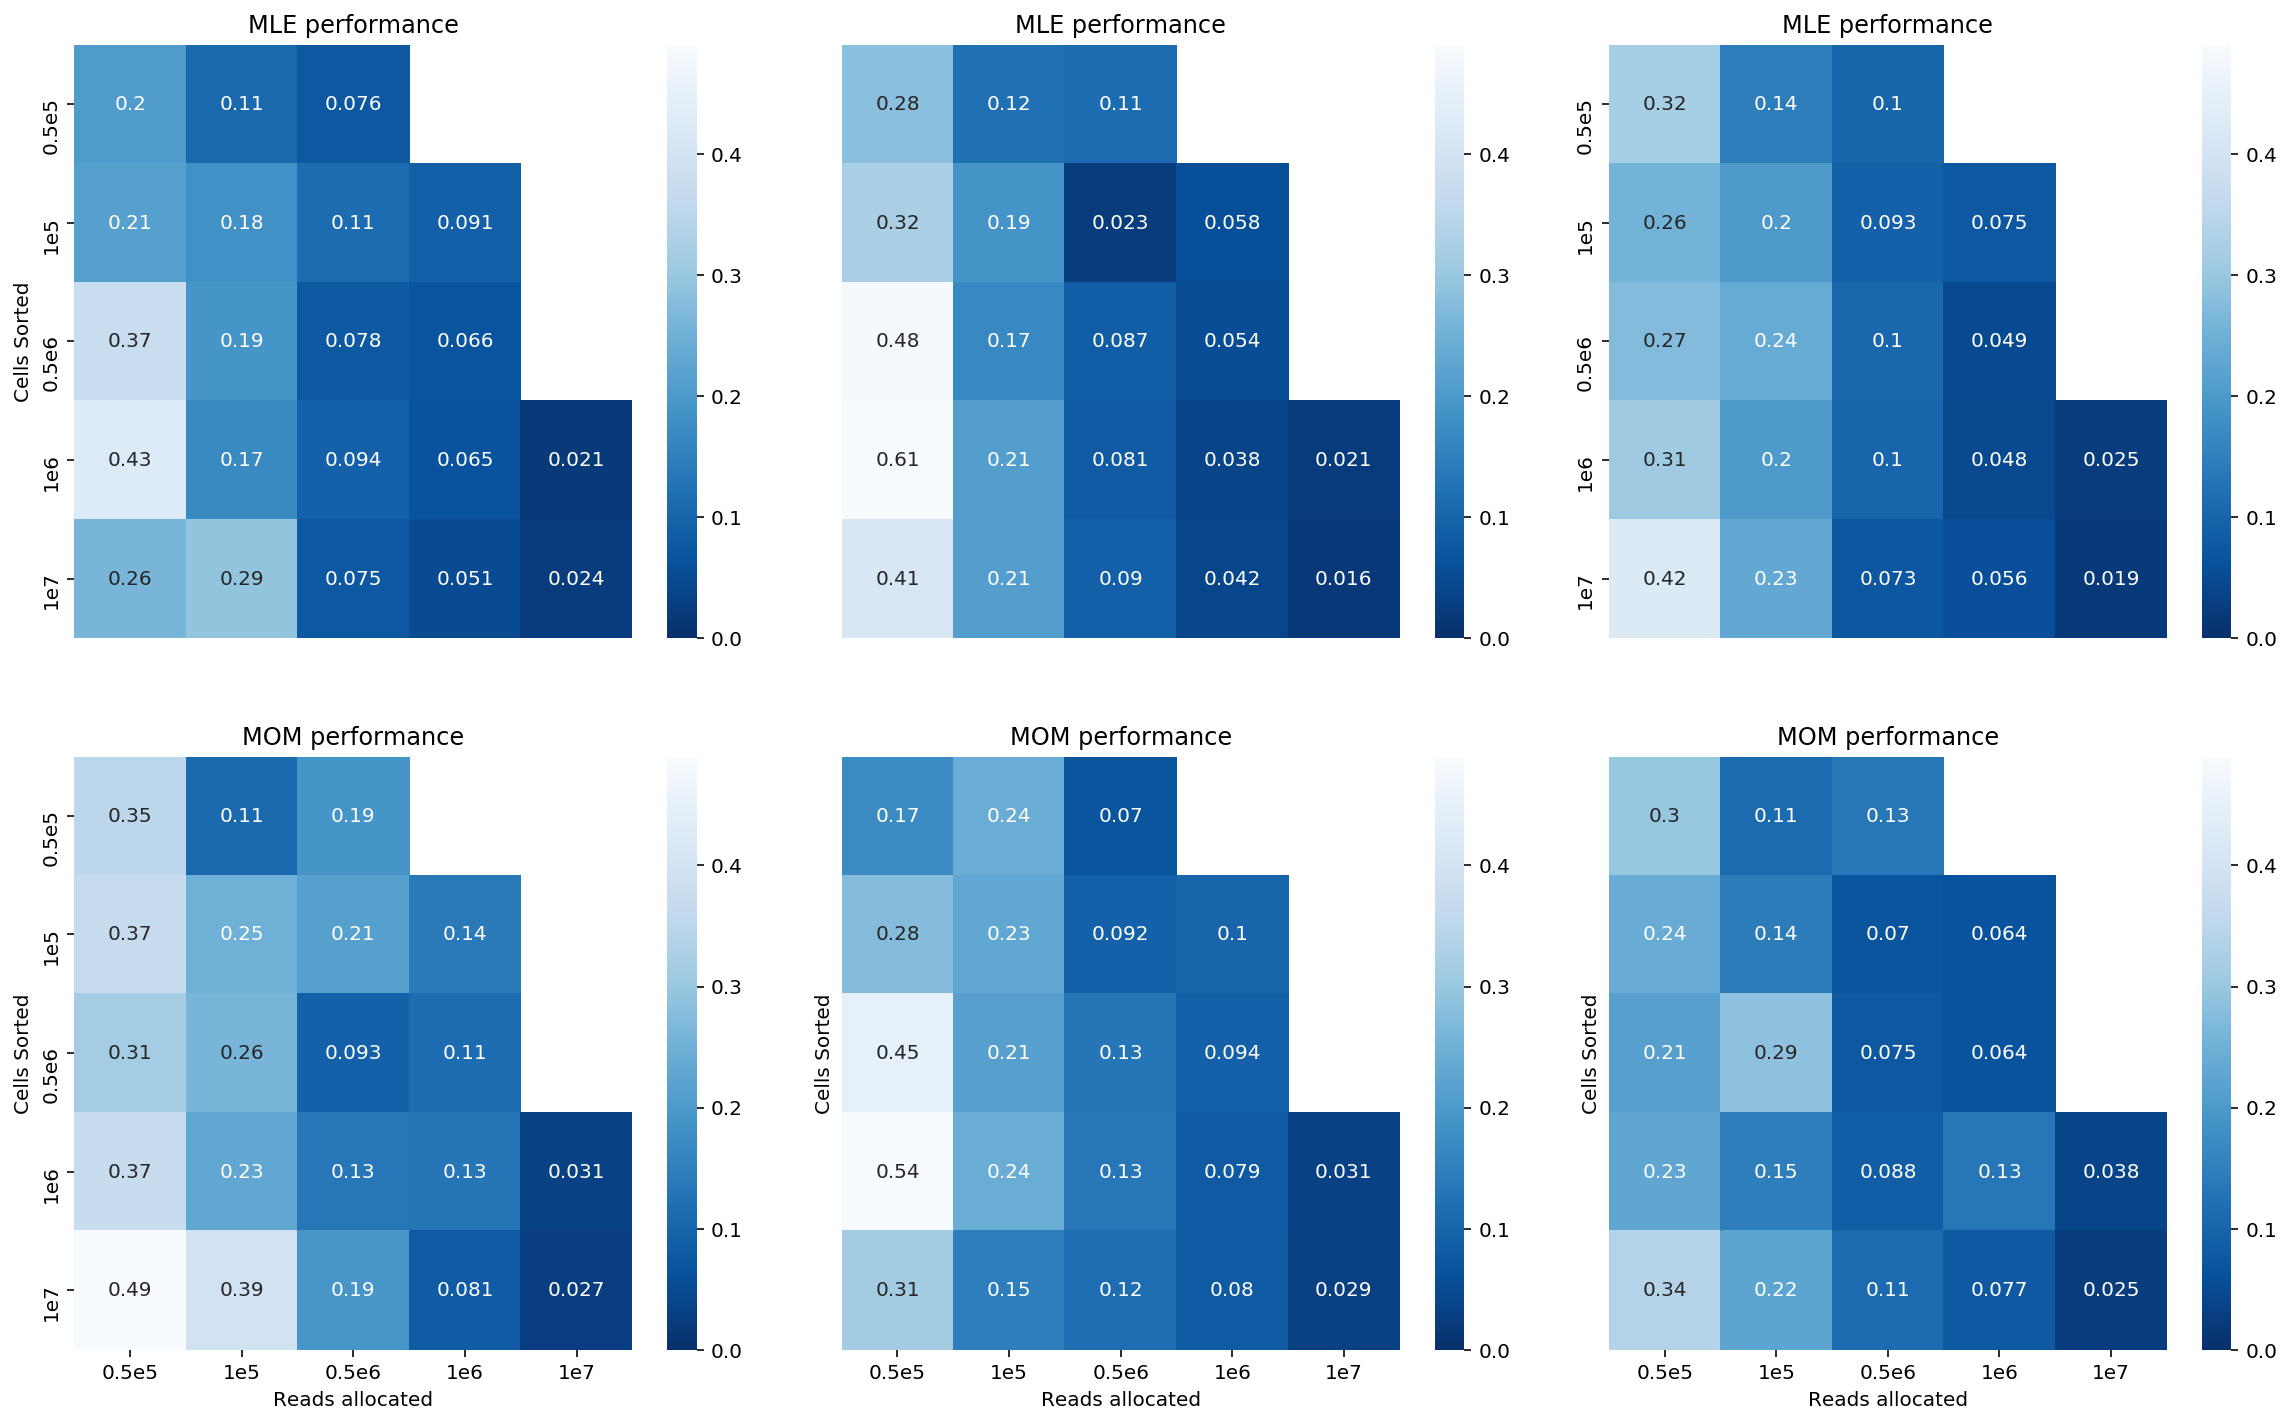

In [6]:
Mean_sur_MLE=np.load('Mean_sur_MLE.npy')
MLE12=100*np.std(Mean_sur_MLE,axis=0)
Mean_sur_MLE=np.load('Mean_sur_MLE2.npy')
MLE16=100*np.std(Mean_sur_MLE,axis=0)
Mean_sur_MLE=np.load('Mean_sur_MLE3.npy')
MLE20=100*np.std(Mean_sur_MLE,axis=0)

Mean_sur_MOM=np.load('Mean_sur_MOM.npy')
MOM12=100*np.std(Mean_sur_MOM,axis=0)
Mean_sur_MOM=np.load('Mean_sur_MOM2.npy')
MOM16=100*np.std(Mean_sur_MOM,axis=0)
Mean_sur_MOM=np.load('Mean_sur_MOM3.npy')
MOM20=100*np.std(Mean_sur_MOM,axis=0)


mask = np.zeros(MLE16.shape, dtype=bool)
mask[0,4]= True
mask[0,3]= True
mask[1,4]= True
mask[2,4]= True

fig = plt.figure(figsize=(20,12))
gs = gsp.GridSpec(nrows=2, ncols=3, figure=fig, width_ratios= [1, 1,1 ],height_ratios=[1, 1 ],wspace=0.1,hspace=0.2)
range_parameters=['0.5e5','1e5','0.5e6','1e6','1e7']
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(MLE12, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=range_parameters, mask = mask,ax=ax1, cmap="Blues_r")
ax1.set_title('MLE performance')
ax1.set(ylabel='Cells Sorted')
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('MLE performance')
sns.heatmap(MLE16, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=False, mask = mask,ax=ax2, cmap="Blues_r")
ax3 = fig.add_subplot(gs[0, 2])
sns.heatmap(MLE20, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=range_parameters, mask = mask,ax=ax3, cmap="Blues_r")
ax3.set_title('MLE performance')
ax1.set_title('MLE performance')
ax4 = fig.add_subplot(gs[1, 0])
ax4.set_title('MOM performance')
sns.heatmap(MOM12, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=range_parameters, mask = mask,ax=ax4, cmap="Blues_r")
ax4.set(xlabel='Reads allocated',ylabel='Cells Sorted')
ax5 = fig.add_subplot(gs[1, 1])
ax5.set_title('MOM performance')
sns.heatmap(MOM16, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=False, mask = mask,ax=ax5, cmap="Blues_r")
ax5.set(xlabel='Reads allocated',ylabel='Cells Sorted')
ax6 = fig.add_subplot(gs[1, 2])
ax6.set_title('MOM performance')
sns.heatmap(MOM20, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=False, mask = mask,ax=ax6, cmap="Blues_r")
ax6.set(xlabel='Reads allocated',ylabel='Cells Sorted')
#plt.title('Average performance of the MLE estimator')

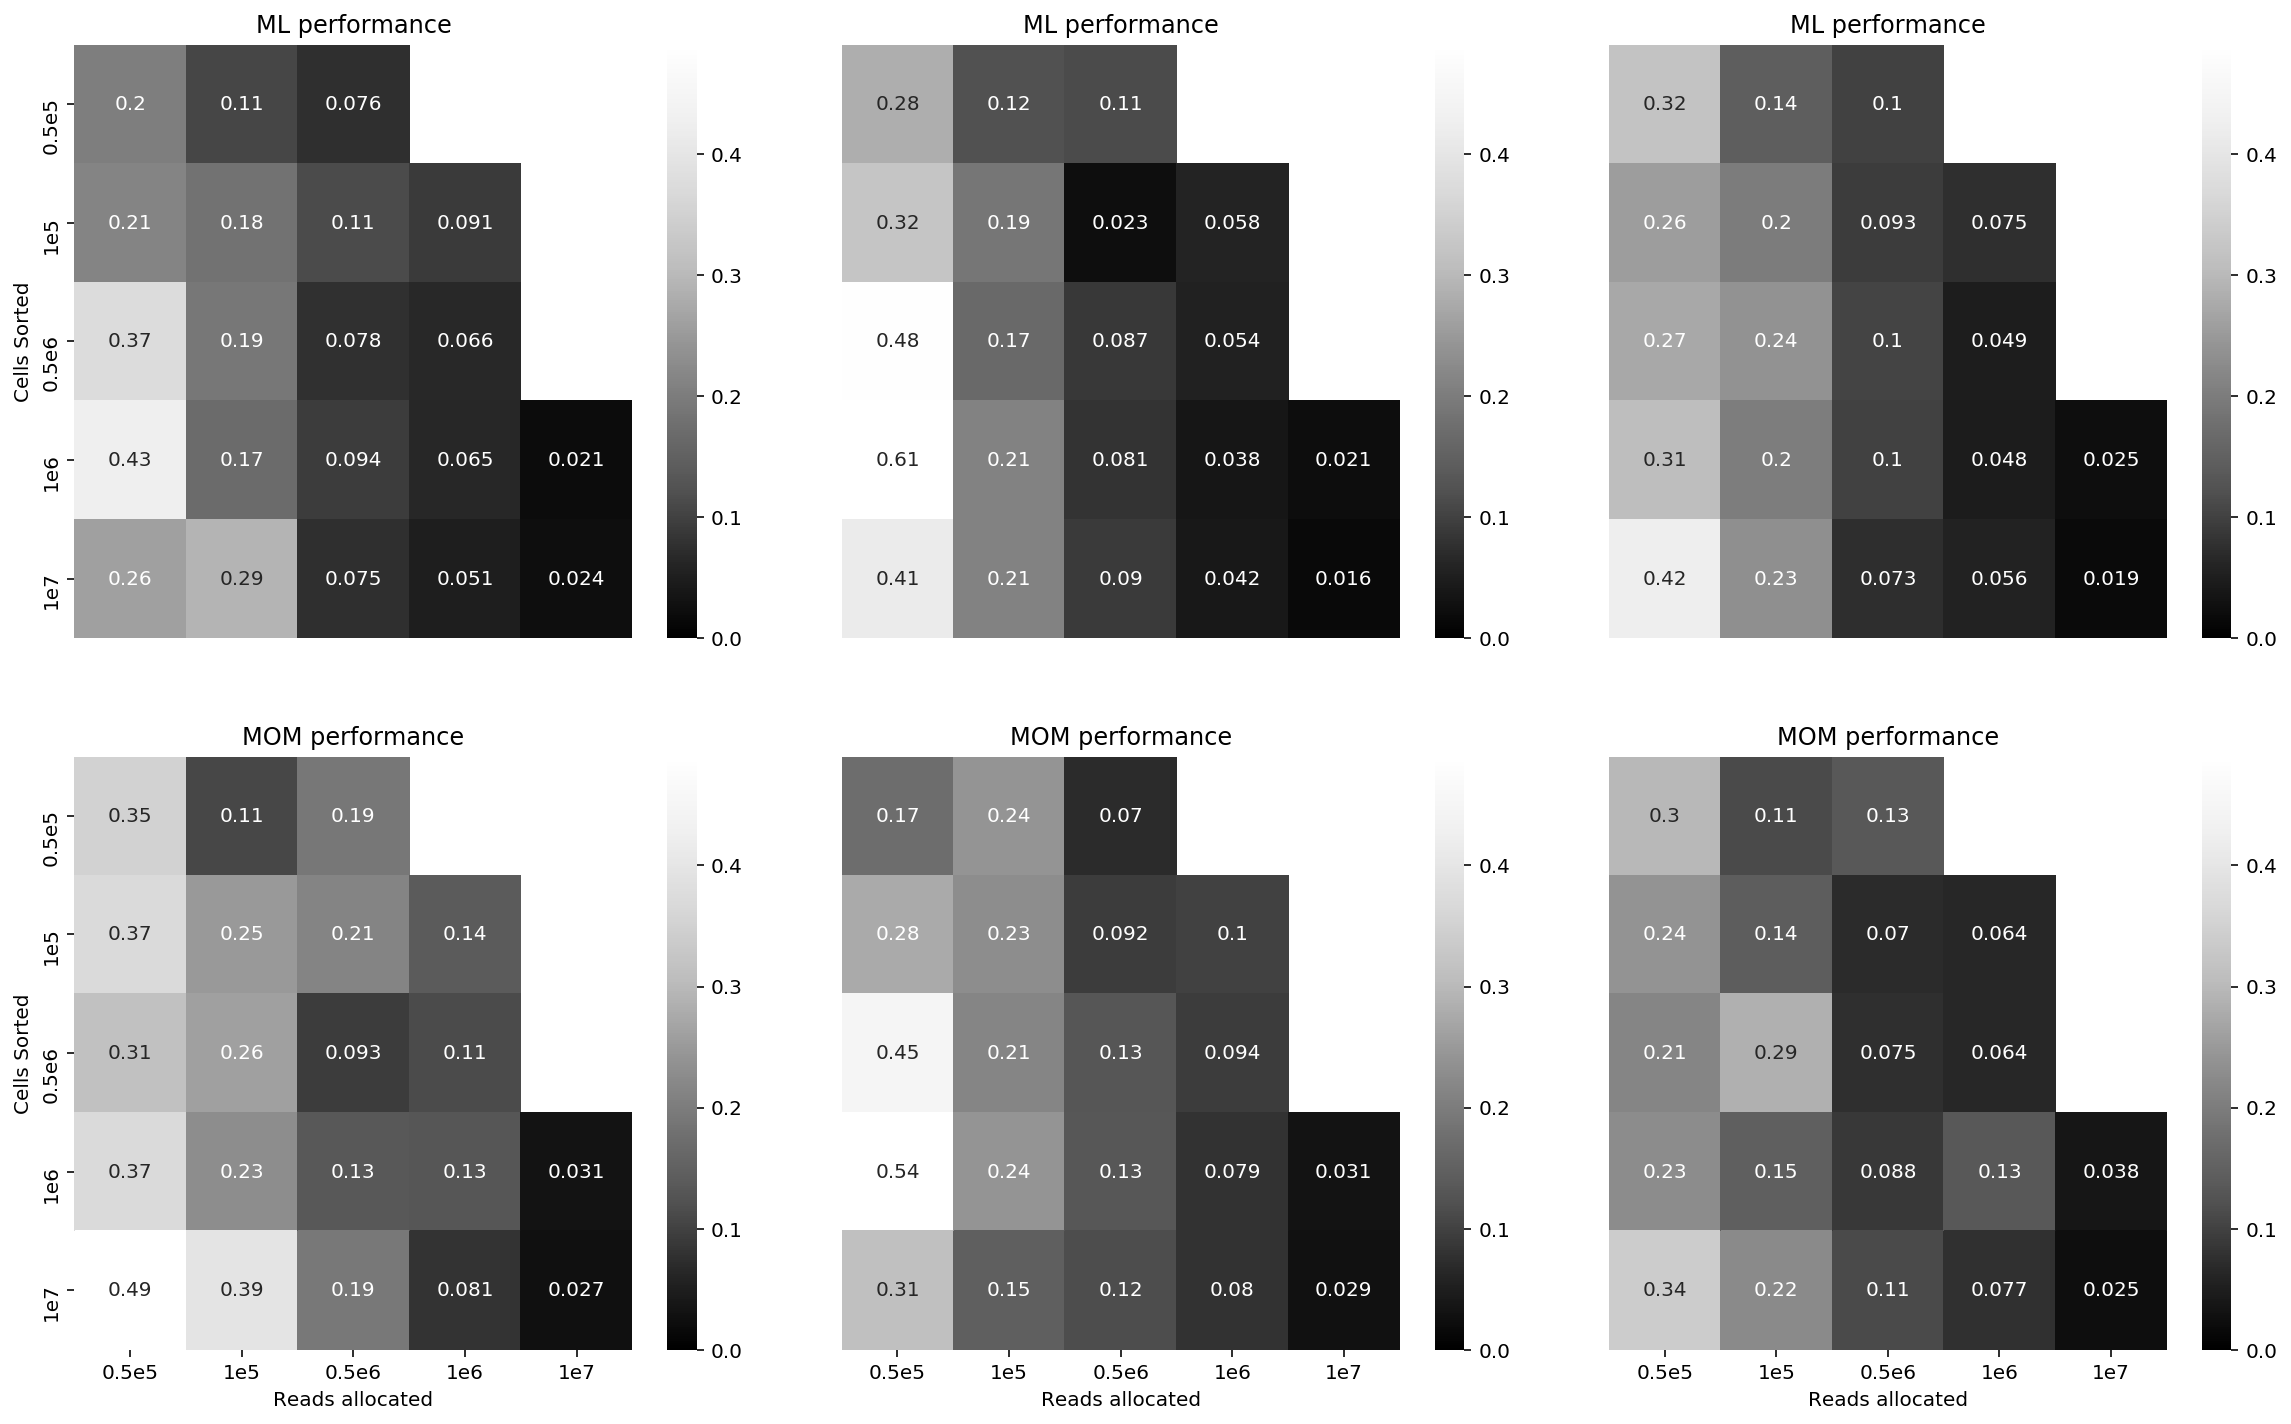

In [26]:
Mean_sur_MLE=np.load('Mean_sur_MLE.npy')
MLE12=100*np.std(Mean_sur_MLE,axis=0)
Mean_sur_MLE=np.load('Mean_sur_MLE2.npy')
MLE16=100*np.std(Mean_sur_MLE,axis=0)
Mean_sur_MLE=np.load('Mean_sur_MLE3.npy')
MLE20=100*np.std(Mean_sur_MLE,axis=0)

Mean_sur_MOM=np.load('Mean_sur_MOM.npy')
MOM12=100*np.std(Mean_sur_MOM,axis=0)
Mean_sur_MOM=np.load('Mean_sur_MOM2.npy')
MOM16=100*np.std(Mean_sur_MOM,axis=0)
Mean_sur_MOM=np.load('Mean_sur_MOM3.npy')
MOM20=100*np.std(Mean_sur_MOM,axis=0)


mask = np.zeros(MLE16.shape, dtype=bool)
mask[0,4]= True
mask[0,3]= True
mask[1,4]= True
mask[2,4]= True

fig = plt.figure(figsize=(20,12))
gs = gsp.GridSpec(nrows=2, ncols=3, figure=fig, width_ratios= [1, 1,1 ],height_ratios=[1, 1 ],wspace=0.1,hspace=0.2)
range_parameters=['0.5e5','1e5','0.5e6','1e6','1e7']
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(MLE12, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=range_parameters, mask = mask,ax=ax1, cmap='Greys_r')
ax1.set_title('ML performance')
ax1.set(ylabel='Cells Sorted')
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('ML performance')
sns.heatmap(MLE16, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=False, mask = mask,ax=ax2, cmap='Greys_r')
ax3 = fig.add_subplot(gs[0, 2])
sns.heatmap(MLE20, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=False, mask = mask,ax=ax3, cmap='Greys_r')
ax3.set_title('ML performance')
ax1.set_title('ML performance')
ax4 = fig.add_subplot(gs[1, 0])
ax4.set_title('MOM performance')
sns.heatmap(MOM12, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=range_parameters, mask = mask,ax=ax4, cmap='Greys_r')
ax4.set(xlabel='Reads allocated',ylabel='Cells Sorted')
ax5 = fig.add_subplot(gs[1, 1])
ax5.set_title('MOM performance')
sns.heatmap(MOM16, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=False, mask = mask,ax=ax5, cmap='Greys_r')
ax5.set(xlabel='Reads allocated')
ax6 = fig.add_subplot(gs[1, 2])
ax6.set_title('MOM performance')
sns.heatmap(MOM20, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=False, mask = mask,ax=ax6, cmap='Greys_r')
ax6.set(xlabel='Reads allocated')
#plt.title('Average performance of the MLE estimator')
plt.savefig('Heatmaps_mu_standard deviation_simulations_original_taniguchi.png',transparent=True,bbox_inches='tight',dpi=600)

We note that the standard error of the simulations is substantially lower than the results of the inference for each combination of experimental parameters (each case)
Averaging 10 replicates for the simulations is then enough to validate our conclusions, as the sampling variability doesn't play a significant role


## Other possible visualisation of the results

In [7]:
MLEmu = {'MAPE': [9.1,10,11,11,11,6.7,7.1,7.9,8,8.1,3.8,3.2,3.2,3.3,3.4,2.7,2.2,2.2,2.3,0.76,0.69,8,8.7,9.7,10,10,5.9,6.2,7.1,7.2,7.4,3.7,3.1,2.9,3,3.2,2.6,2,2.1,2.1,0.71,0.64,7.3,8.1,9.3,9.4,9.7,5.5,5.9,6.8,6.9,7,3.9,3.1,2.8,2.9,3,2.8,2,2,2.1,0.73,0.61],
        'Cells': [0.5e5,1e5,0.5e6,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,1e5,0.5e6,1e6,1e7,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,1e5,0.5e6,1e6,1e7,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,1e5,0.5e6,1e6,1e7,1e6,1e7],
        'Reads':[0.5e5,0.5e5,0.5e5,0.5e5,0.5e5,1e5,1e5,1e5,1e5,1e5,0.5e6,0.5e6,0.5e6,0.5e6,0.5e6,1e6,1e6,1e6,1e6,1e7,1e7,0.5e5,0.5e5,0.5e5,0.5e5,0.5e5,1e5,1e5,1e5,1e5,1e5,0.5e6,0.5e6,0.5e6,0.5e6,0.5e6,1e6,1e6,1e6,1e6,1e7,1e7,0.5e5,0.5e5,0.5e5,0.5e5,0.5e5,1e5,1e5,1e5,1e5,1e5,0.5e6,0.5e6,0.5e6,0.5e6,0.5e6,1e6,1e6,1e6,1e6,1e7,1e7],
        'Bins':[12]*21+[16]*21+[20]*21
        
        }

df_MLEmu = pd.DataFrame(MLEmu, columns = ['MAPE', 'Cells','Reads','Bins'])

MOMmu = {'MAPE': [19,20,21,21,21,19,19,20,20,20,18,19,19,20,20,19,20,20,20,20,20,11,12,13,13,13,10,11,12,12,12,9.7,9.9,10,11,11,9.8,10,11,11,11,11,8.4,8.7,9.6,9.8,10,7.4,7.7,8.3,8.4,8.3,6.6,6.4,6.7,6.9,7.1,6.2,6.7,6.6,7,6.9,7],
        'Cells': [0.5e5,1e5,0.5e6,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,1e5,0.5e6,1e6,1e7,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,1e5,0.5e6,1e6,1e7,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,0.5e5,1e5,0.5e6,1e6,1e7,1e5,0.5e6,1e6,1e7,1e6,1e7],
        'Reads':[0.5e5,0.5e5,0.5e5,0.5e5,0.5e5,1e5,1e5,1e5,1e5,1e5,0.5e6,0.5e6,0.5e6,0.5e6,0.5e6,1e6,1e6,1e6,1e6,1e7,1e7,0.5e5,0.5e5,0.5e5,0.5e5,0.5e5,1e5,1e5,1e5,1e5,1e5,0.5e6,0.5e6,0.5e6,0.5e6,0.5e6,1e6,1e6,1e6,1e6,1e7,1e7,0.5e5,0.5e5,0.5e5,0.5e5,0.5e5,1e5,1e5,1e5,1e5,1e5,0.5e6,0.5e6,0.5e6,0.5e6,0.5e6,1e6,1e6,1e6,1e6,1e7,1e7],
        'Bins':[12]*21+[16]*21+[20]*21
        
        }

df_MOMmu = pd.DataFrame(MOMmu, columns = ['MAPE', 'Cells','Reads','Bins'])

Text(0, 0.5, 'MAPE (%) ')

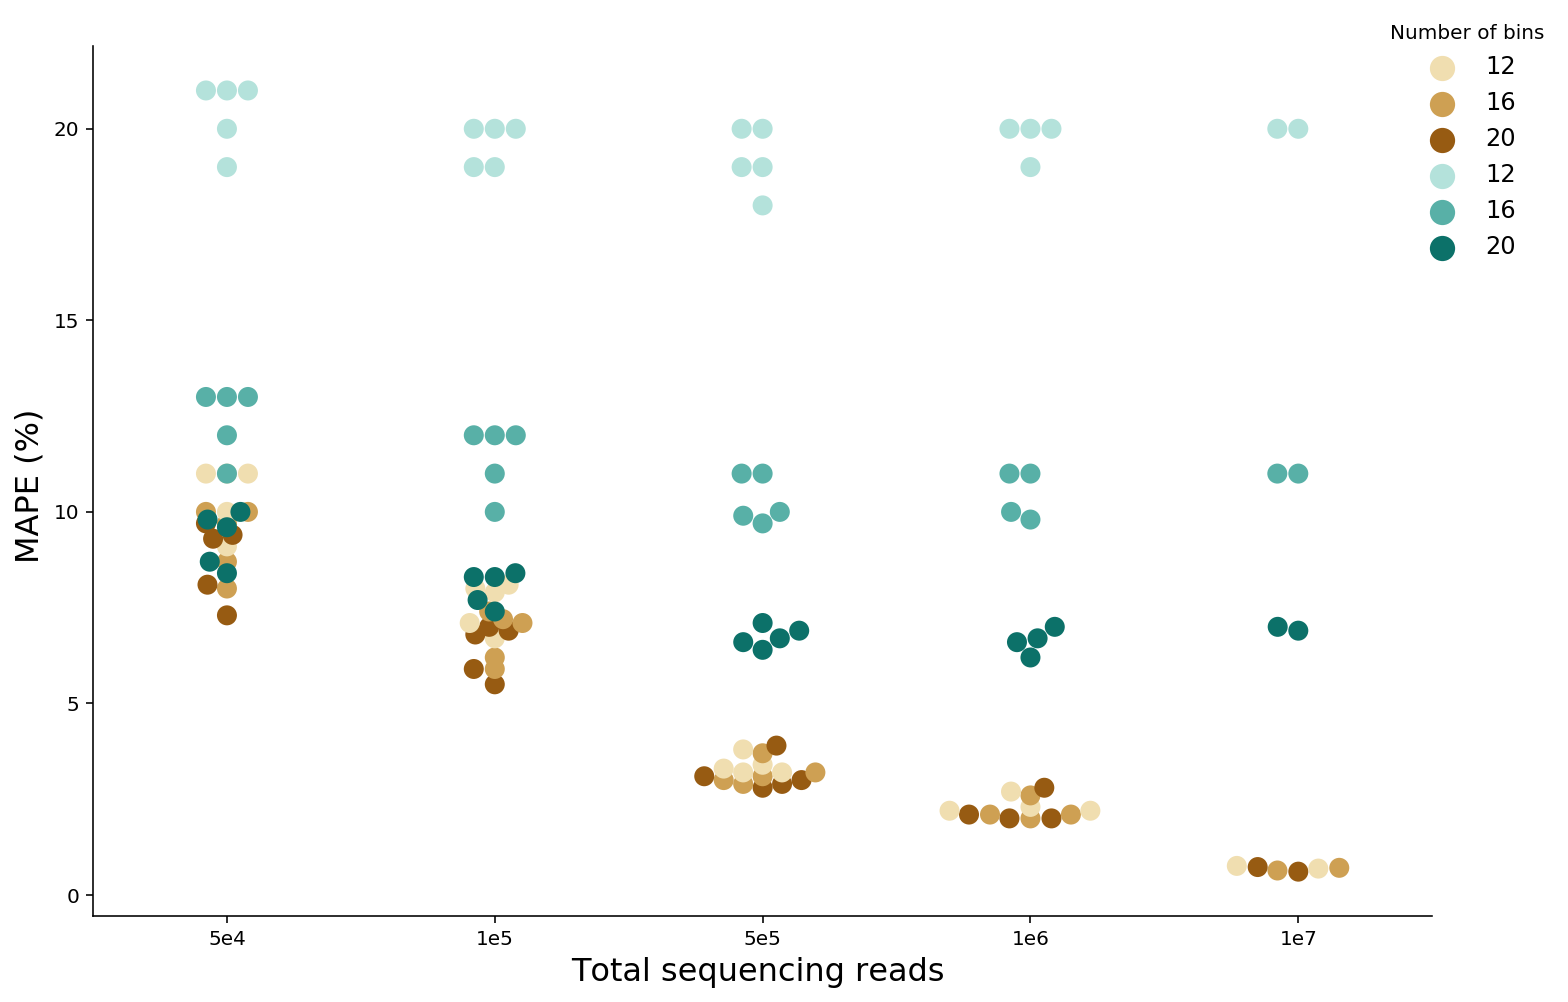

In [8]:
import matplotlib.ticker as mtick
pd.set_option('display.float_format', '{:.2g}'.format)
fig_dims = (12, 8)
x = np.linspace(0, 4, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.swarmplot(x="Reads", y="MAPE", hue="Bins", data=MLEmu,size=10,palette=sns.color_palette("BrBG_r", 7)[4:])
#plt.setp(ax.get_legend().get_texts(), fontsize='22')
#plt.setp(ax.get_legend().get_title(), fontsize='22')
#ax.set(title='Comparison Estimators')
sns.despine()

ax1 = sns.swarmplot(x="Reads", y="MAPE", hue="Bins", data=df_MOMmu ,size=10,palette= sns.color_palette("BrBG", 7)[4:])
my_xticks = ['5e4','1e5','5e5','1e6','1e7']
plt.xticks(x, my_xticks)
plt.legend(title='Number of bins',frameon=False,fontsize=12,markerscale=1.5, loc='upper right', bbox_to_anchor=(1.1, 1.05)  )
plt.xlabel('Total sequencing reads ',fontsize=16)
plt.ylabel('MAPE (%) ',fontsize=16)
#ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.ticklabel_format(style='plain', axis='x')
#ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.3e'))
#plt.setp(ax1.get_legend().get_texts(), fontsize='22')
#plt.setp(ax1.get_legend().get_title(), fontsize='22')
#plt.savefig('Comparison_mu_estimators_multiple_variables.png',transparent=True,bbox_inches='tight',dpi=600)

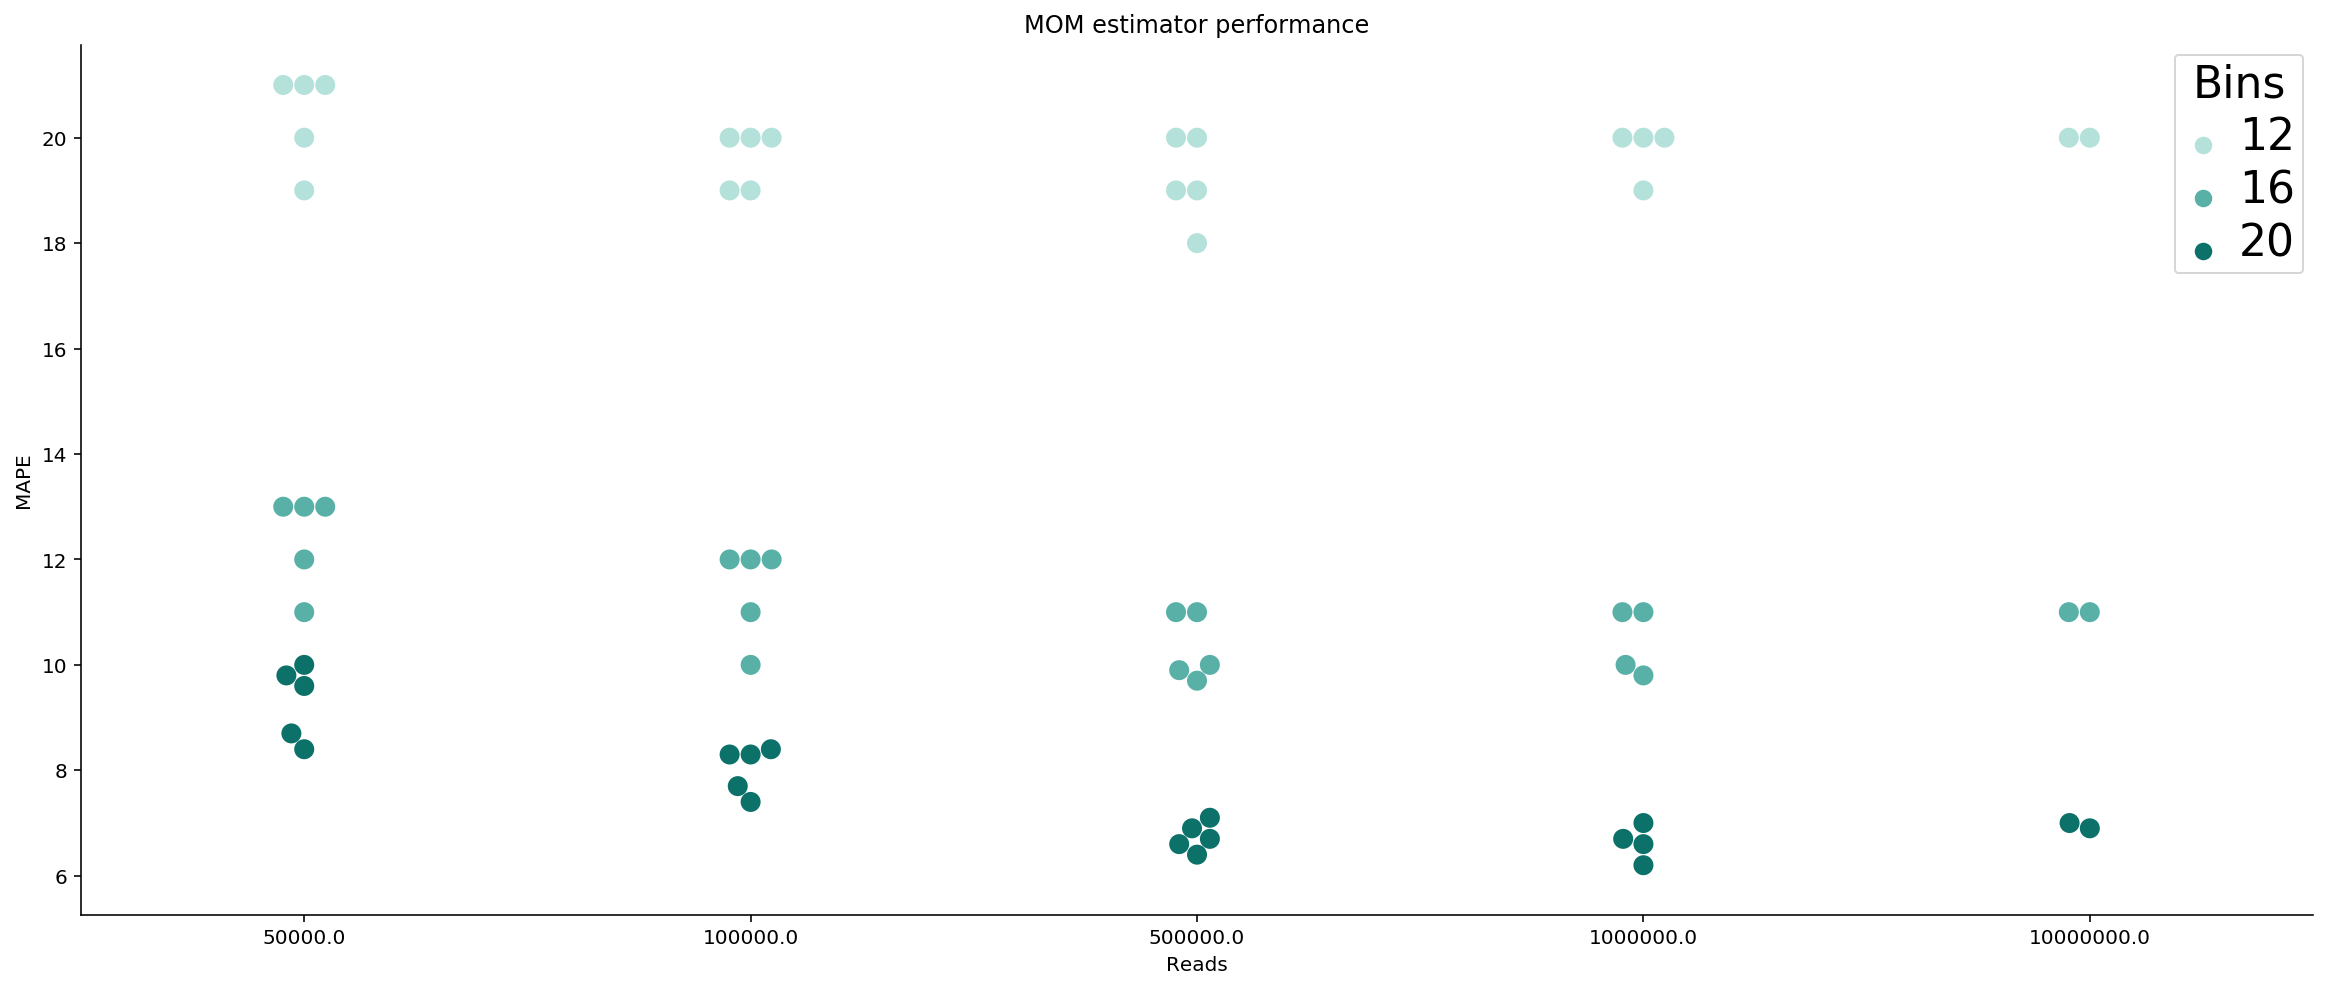

In [10]:
fig_dims = (20, 8)
x = np.linspace(0, 2, 60)
fig, ax = plt.subplots(figsize=fig_dims)
ax1 = sns.swarmplot(x="Reads", y="MAPE", hue="Bins", data=df_MOMmu,size=10,palette= sns.color_palette("BrBG", 7)[4:])
plt.setp(ax1.get_legend().get_texts(), fontsize='22')
plt.setp(ax1.get_legend().get_title(), fontsize='22')
ax1.set(title='MOM estimator performance')
sns.despine()

#  Estimating the variance $\sigma^{2}$ 
 $$\mathbb{E}_{data}[\frac{|\hat{\sigma^{2}}-\sigma^{2}|}{\sigma^{2}}] $$ 

## Results of the inference when varying the experimental parameters

[Text(848.5249999999999, 0.5, 'Cells Sorted'),
 Text(0.5, 69.00000000000009, 'Reads allocated')]

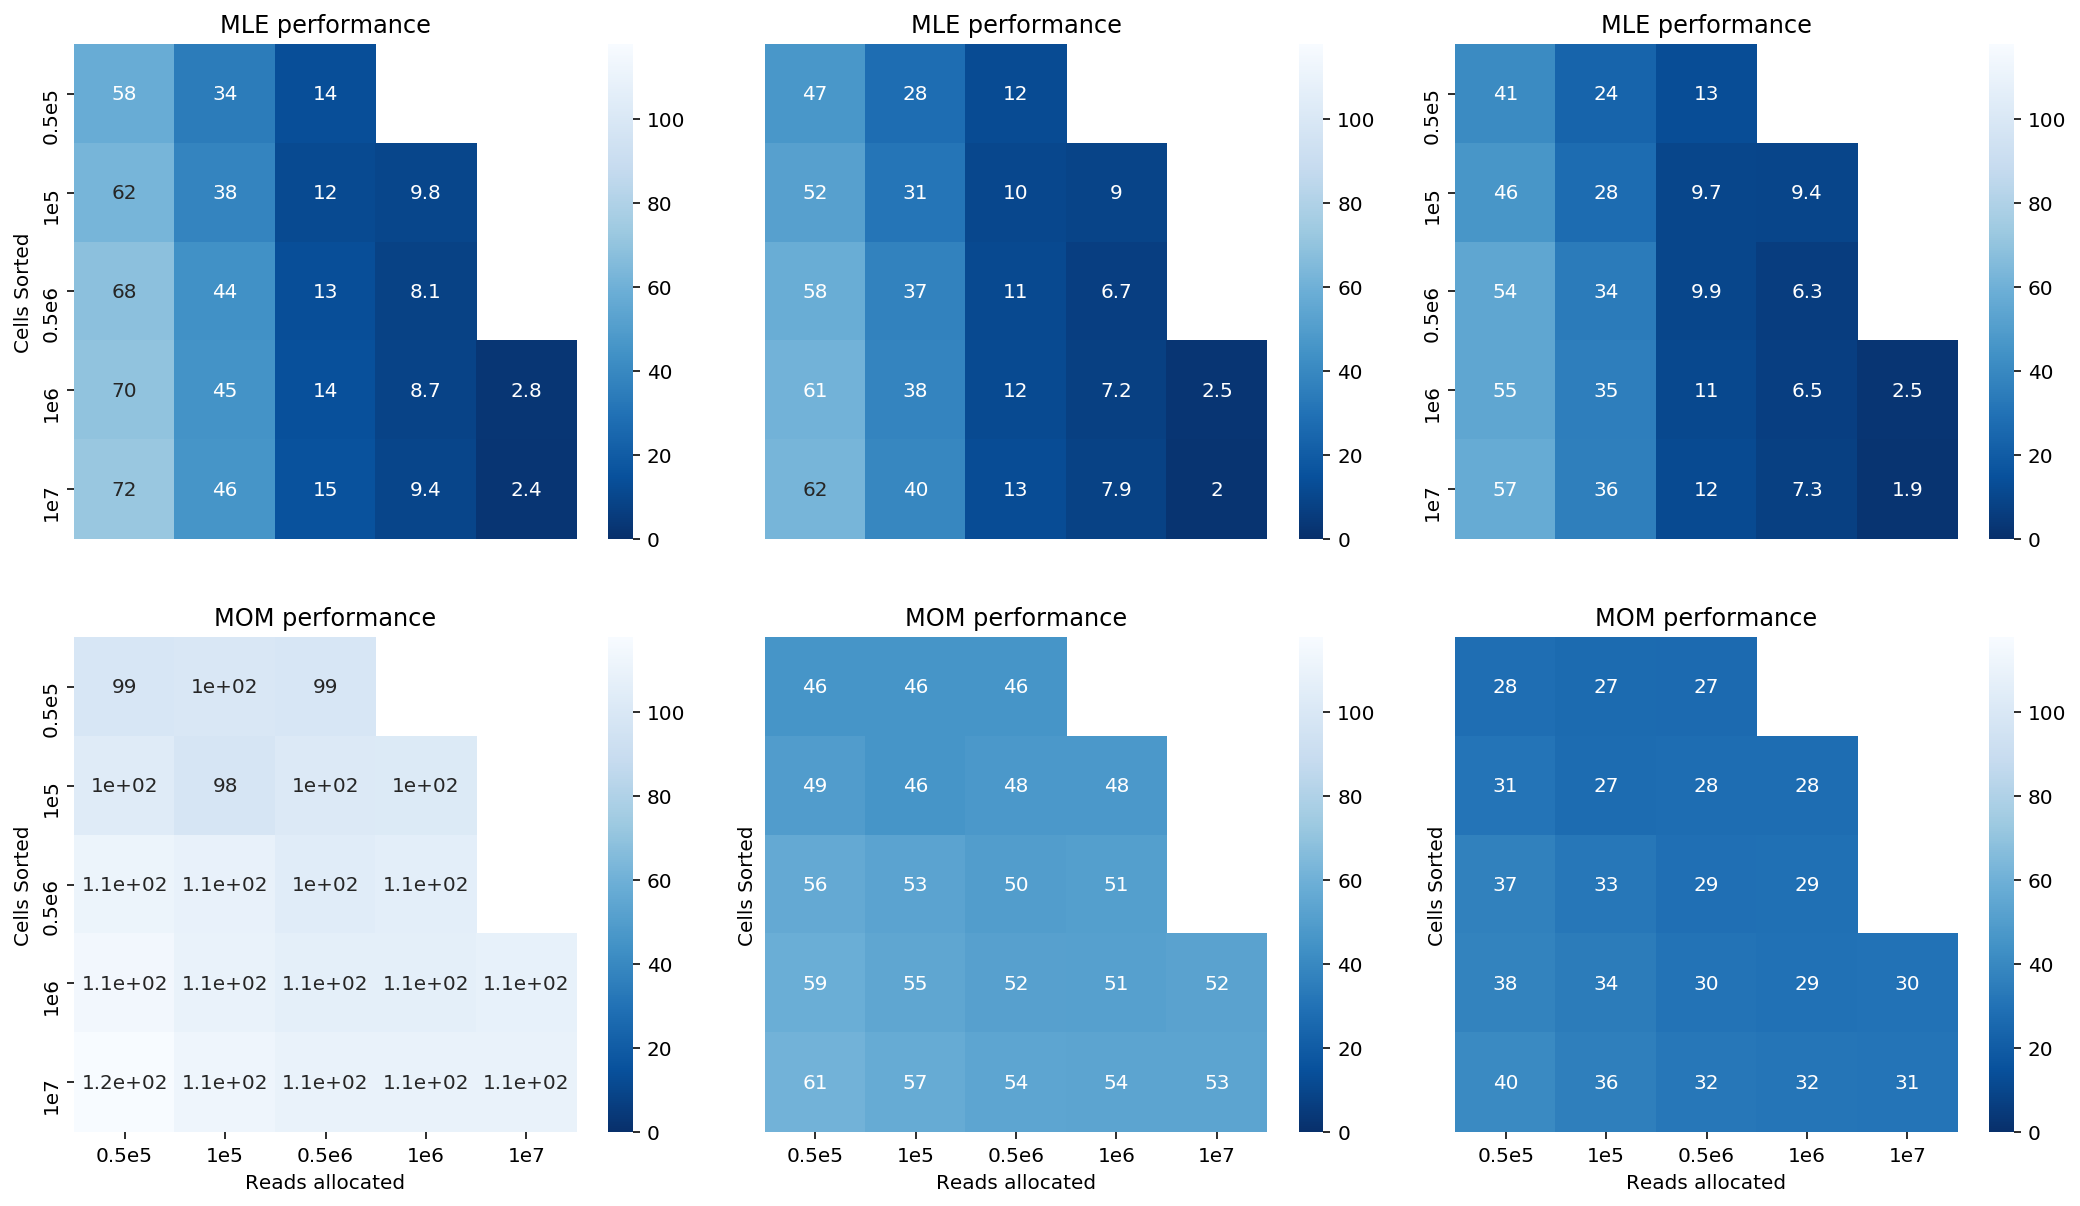

In [21]:
Mean_sur_MLE=np.load('Var_sur_MLE.npy')
MLE12=100*np.mean(Mean_sur_MLE,axis=0)
Mean_sur_MLE=np.load('Var_sur_MLE2.npy')
MLE16=100*np.mean(Mean_sur_MLE,axis=0)
Mean_sur_MLE=np.load('Var_sur_MLE3.npy')
MLE20=100*np.mean(Mean_sur_MLE,axis=0)

Mean_sur_MOM=np.load('Var_sur_MOM.npy')
MOM12=100*np.mean(Mean_sur_MOM,axis=0)
Mean_sur_MOM=np.load('Var_sur_MOM2.npy')
MOM16=100*np.mean(Mean_sur_MOM,axis=0)
Mean_sur_MOM=np.load('Var_sur_MOM3.npy')
MOM20=100*np.mean(Mean_sur_MOM,axis=0)


mask = np.zeros(MLE16.shape, dtype=bool)
mask[0,4]= True
mask[0,3]= True
mask[1,4]= True
mask[2,4]= True

fig = plt.figure(figsize=(18,10))
gs = gsp.GridSpec(nrows=2, ncols=3, figure=fig, width_ratios= [1, 1,1 ],height_ratios=[1, 1 ],wspace=0.1,hspace=0.2)
range_parameters=['0.5e5','1e5','0.5e6','1e6','1e7']
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(MLE12, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=range_parameters, mask = mask,ax=ax1, cmap="Blues_r")
ax1.set_title('MLE performance')
ax1.set(ylabel='Cells Sorted')
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('MLE performance')
sns.heatmap(MLE16, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=False, mask = mask,ax=ax2, cmap="Blues_r")
ax3 = fig.add_subplot(gs[0, 2])
sns.heatmap(MLE20, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=range_parameters, mask = mask,ax=ax3, cmap="Blues_r")
ax3.set_title('MLE performance')
ax1.set_title('MLE performance')
ax4 = fig.add_subplot(gs[1, 0])
ax4.set_title('MOM performance')
sns.heatmap(MOM12, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=range_parameters, mask = mask,ax=ax4, cmap="Blues_r")
ax4.set(xlabel='Reads allocated',ylabel='Cells Sorted')
ax5 = fig.add_subplot(gs[1, 1])
ax5.set_title('MOM performance')
sns.heatmap(MOM16, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=False, mask = mask,ax=ax5, cmap="Blues_r")
ax5.set(xlabel='Reads allocated',ylabel='Cells Sorted')
ax6 = fig.add_subplot(gs[1, 2])
ax6.set_title('MOM performance')
sns.heatmap(MOM20, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=False, mask = mask,ax=ax6, cmap="Blues_r")
ax6.set(xlabel='Reads allocated',ylabel='Cells Sorted')
#plt.title('Average performance of the MLE estimator')


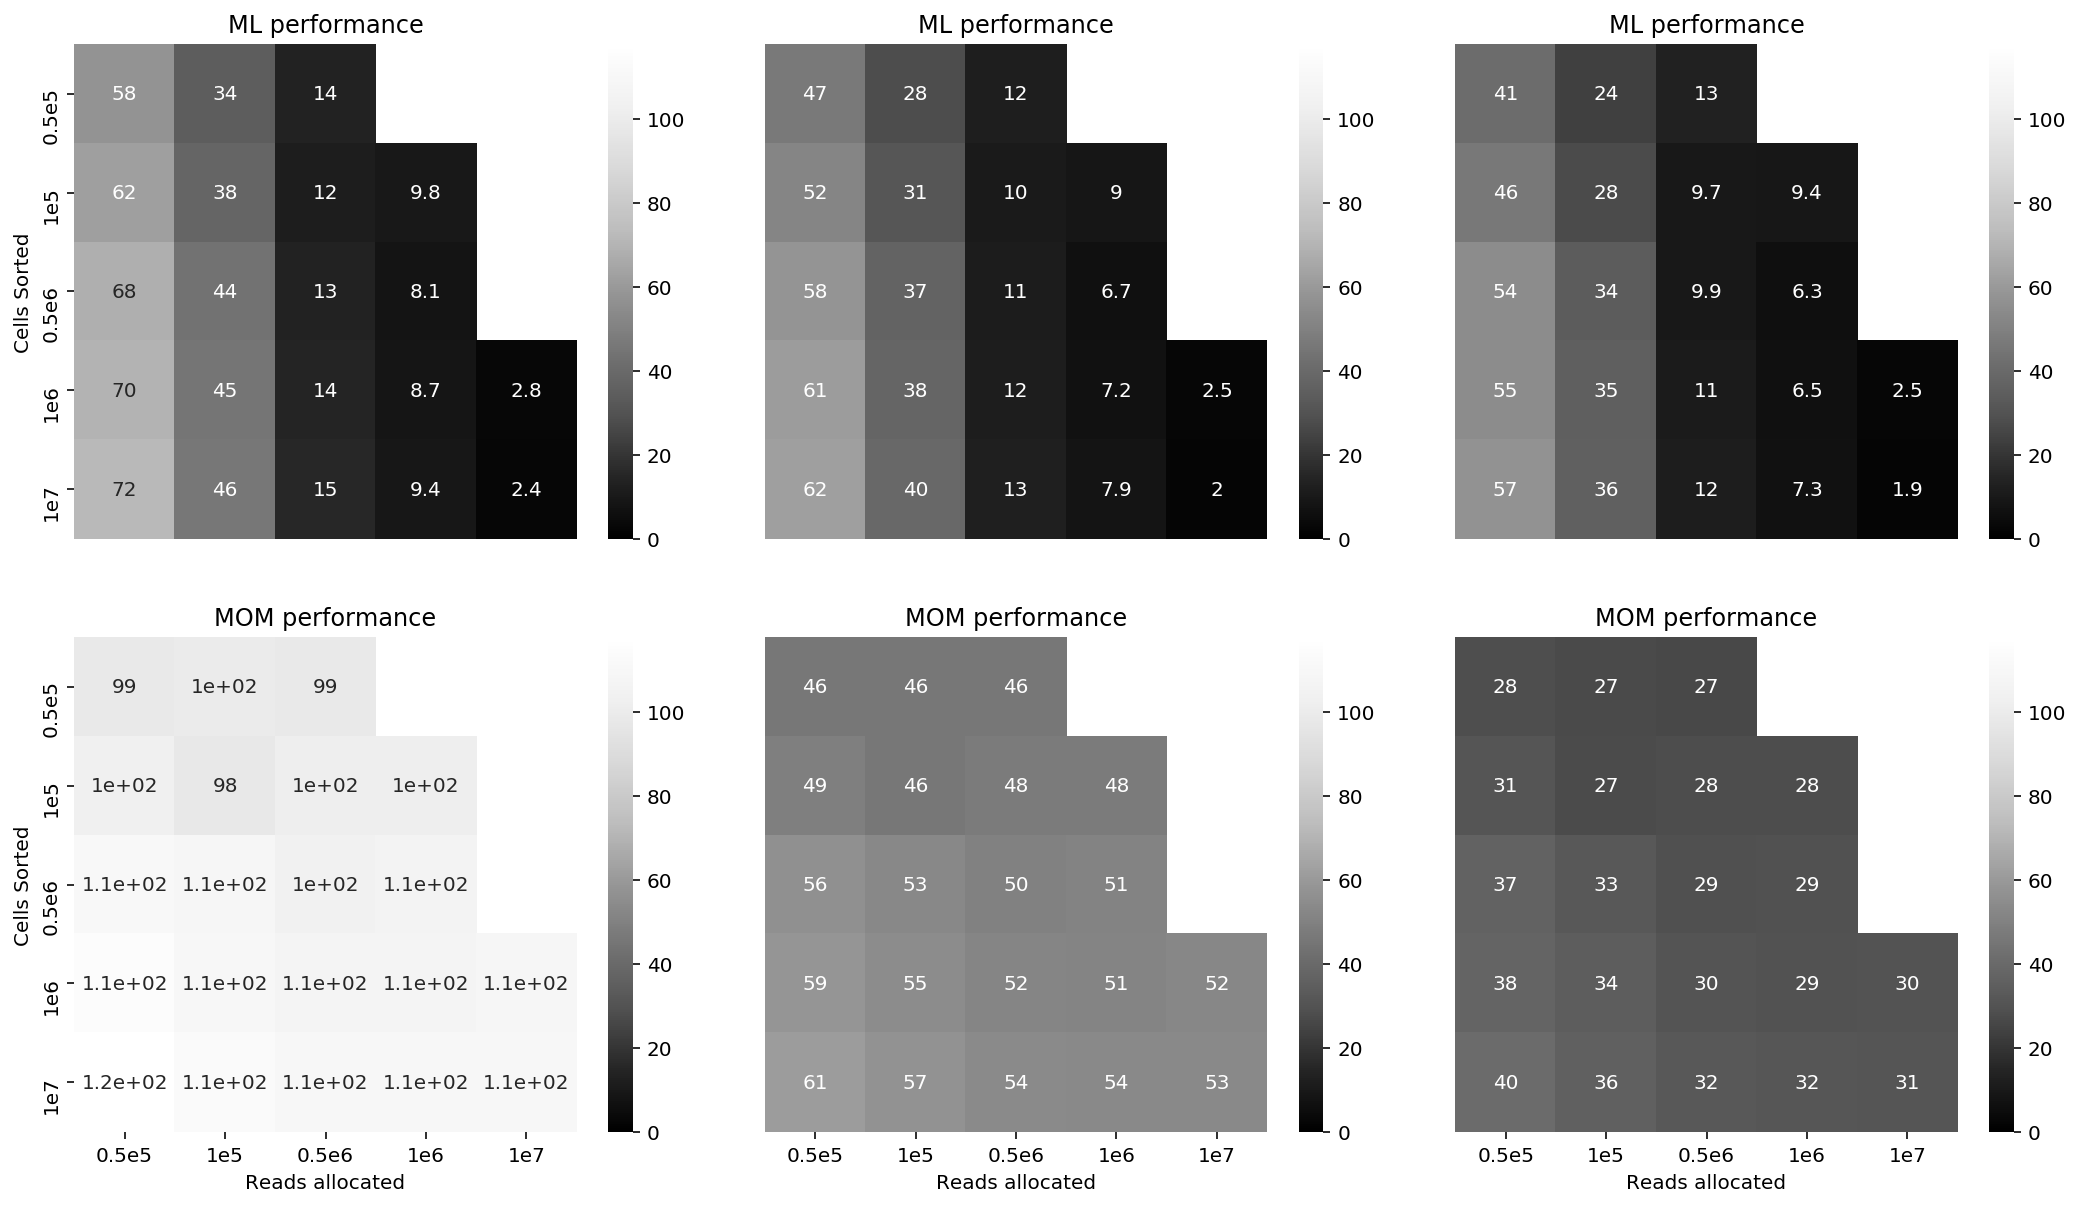

In [73]:
Mean_sur_MLE=np.load('Var_sur_MLE.npy')
MLE12=100*np.mean(Mean_sur_MLE,axis=0)
Mean_sur_MLE=np.load('Var_sur_MLE2.npy')
MLE16=100*np.mean(Mean_sur_MLE,axis=0)
Mean_sur_MLE=np.load('Var_sur_MLE3.npy')
MLE20=100*np.mean(Mean_sur_MLE,axis=0)

Mean_sur_MOM=np.load('Var_sur_MOM.npy')
MOM12=100*np.mean(Mean_sur_MOM,axis=0)
Mean_sur_MOM=np.load('Var_sur_MOM2.npy')
MOM16=100*np.mean(Mean_sur_MOM,axis=0)
Mean_sur_MOM=np.load('Var_sur_MOM3.npy')
MOM20=100*np.mean(Mean_sur_MOM,axis=0)


mask = np.zeros(MLE16.shape, dtype=bool)
mask[0,4]= True
mask[0,3]= True
mask[1,4]= True
mask[2,4]= True

fig = plt.figure(figsize=(18,10))
gs = gsp.GridSpec(nrows=2, ncols=3, figure=fig, width_ratios= [1, 1,1 ],height_ratios=[1, 1 ],wspace=0.1,hspace=0.2)
range_parameters=['0.5e5','1e5','0.5e6','1e6','1e7']
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(MLE12, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=range_parameters, mask = mask,ax=ax1, cmap='Greys_r')
ax1.set_title('ML performance')
ax1.set(ylabel='Cells Sorted')
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('ML performance')
sns.heatmap(MLE16, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=False, mask = mask,ax=ax2, cmap='Greys_r')
ax3 = fig.add_subplot(gs[0, 2])
sns.heatmap(MLE20, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=False, mask = mask,ax=ax3, cmap='Greys_r')
ax3.set_title('ML performance')
ax1.set_title('ML performance')
ax4 = fig.add_subplot(gs[1, 0])
ax4.set_title('MOM performance')
sns.heatmap(MOM12, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=range_parameters, mask = mask,ax=ax4, cmap='Greys_r')
ax4.set(xlabel='Reads allocated',ylabel='Cells Sorted')
ax5 = fig.add_subplot(gs[1, 1])
ax5.set_title('MOM performance')
sns.heatmap(MOM16, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=False, mask = mask,ax=ax5, cmap='Greys_r')
ax5.set(xlabel='Reads allocated')
ax6 = fig.add_subplot(gs[1, 2])
ax6.set_title('MOM performance')
sns.heatmap(MOM20, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=False, mask = mask,ax=ax6, cmap='Greys_r')
ax6.set(xlabel='Reads allocated')
plt.savefig('Heatmaps_variance_original_taniguchi.png',transparent=True,bbox_inches='tight',dpi=600)

## Accounting for sampling variability 

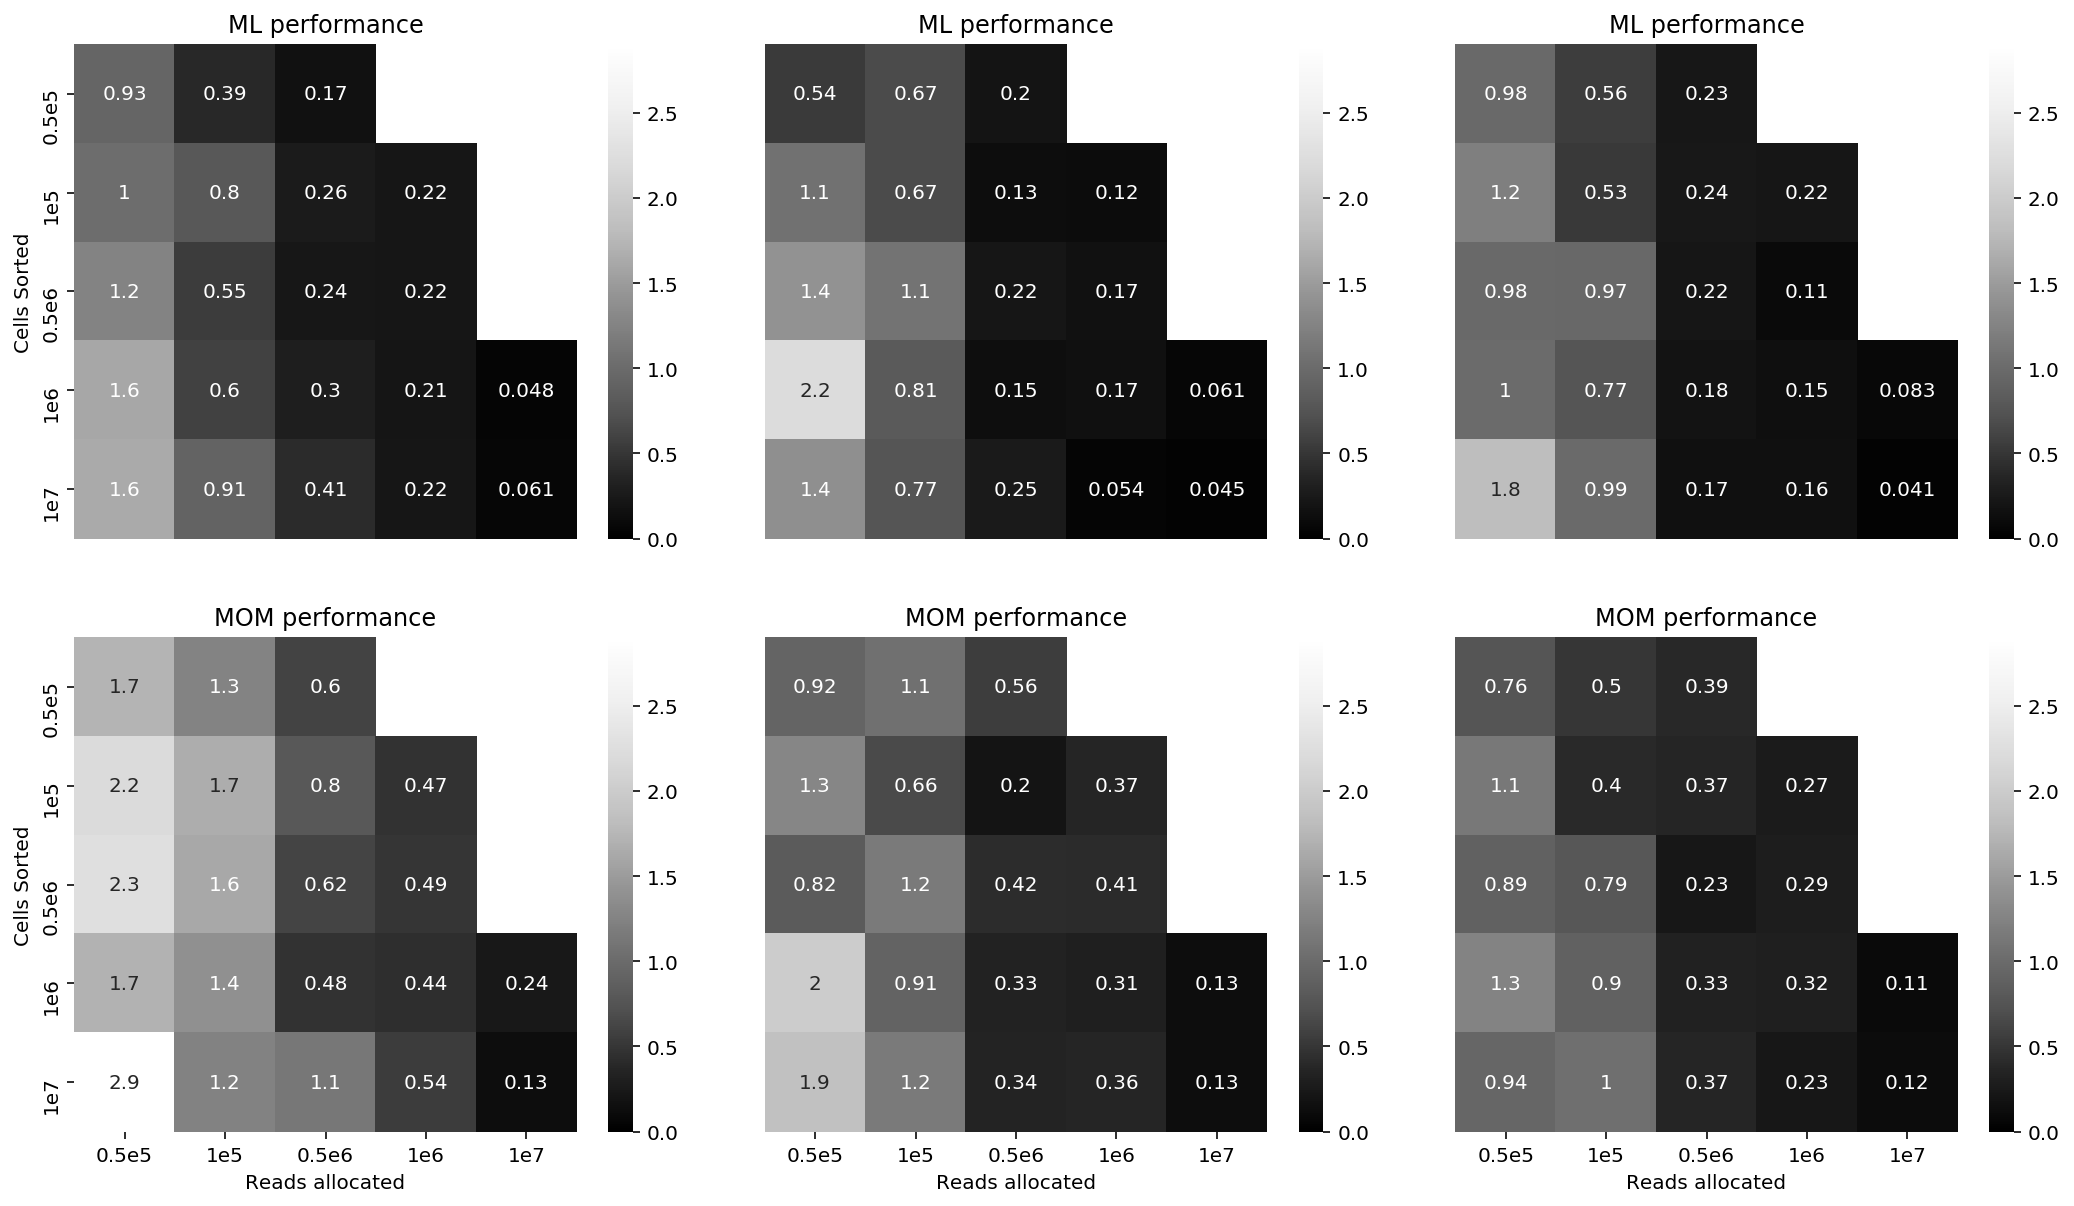

In [72]:
Mean_sur_MLE=np.load('Var_sur_MLE.npy')
MLE12=100*np.std(Mean_sur_MLE,axis=0)
Mean_sur_MLE=np.load('Var_sur_MLE2.npy')
MLE16=100*np.std(Mean_sur_MLE,axis=0)
Mean_sur_MLE=np.load('Var_sur_MLE3.npy')
MLE20=100*np.std(Mean_sur_MLE,axis=0)

Mean_sur_MOM=np.load('Var_sur_MOM.npy')
MOM12=100*np.std(Mean_sur_MOM,axis=0)
Mean_sur_MOM=np.load('Var_sur_MOM2.npy')
MOM16=100*np.std(Mean_sur_MOM,axis=0)
Mean_sur_MOM=np.load('Var_sur_MOM3.npy')
MOM20=100*np.std(Mean_sur_MOM,axis=0)


mask = np.zeros(MLE16.shape, dtype=bool)
mask[0,4]= True
mask[0,3]= True
mask[1,4]= True
mask[2,4]= True

fig = plt.figure(figsize=(18,10))
gs = gsp.GridSpec(nrows=2, ncols=3, figure=fig, width_ratios= [1, 1,1 ],height_ratios=[1, 1 ],wspace=0.1,hspace=0.2)
range_parameters=['0.5e5','1e5','0.5e6','1e6','1e7']
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(MLE12, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=range_parameters, mask = mask,ax=ax1, cmap='Greys_r')
ax1.set_title('ML performance')
ax1.set(ylabel='Cells Sorted')
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('ML performance')
sns.heatmap(MLE16, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=False, mask = mask,ax=ax2, cmap='Greys_r')
ax3 = fig.add_subplot(gs[0, 2])
sns.heatmap(MLE20, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=False, yticklabels=False, mask = mask,ax=ax3, cmap='Greys_r')
ax3.set_title('ML performance')
ax1.set_title('ML performance')
ax4 = fig.add_subplot(gs[1, 0])
ax4.set_title('MOM performance')
sns.heatmap(MOM12, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=range_parameters, mask = mask,ax=ax4, cmap='Greys_r')
ax4.set(xlabel='Reads allocated',ylabel='Cells Sorted')
ax5 = fig.add_subplot(gs[1, 1])
ax5.set_title('MOM performance')
sns.heatmap(MOM16, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=False, mask = mask,ax=ax5, cmap='Greys_r')
ax5.set(xlabel='Reads allocated')
ax6 = fig.add_subplot(gs[1, 2])
ax6.set_title('MOM performance')
sns.heatmap(MOM20, vmin=0, vmax=MOM12.max(),annot=True,xticklabels=range_parameters, yticklabels=False, mask = mask,ax=ax6, cmap='Greys_r')
ax6.set(xlabel='Reads allocated')
plt.savefig('Heatmaps_variance_std_simulations_original_taniguchi.png',transparent=True,bbox_inches='tight',dpi=600)

Same conclusion apply: The sampling variability is small enough to discard its role during the conclusions